# Capstone Project: Battle of the Neighborhoods in Vancouver

### IBM Data Science Track - Applied Data Science Capstone

*Lydia Langbroek*

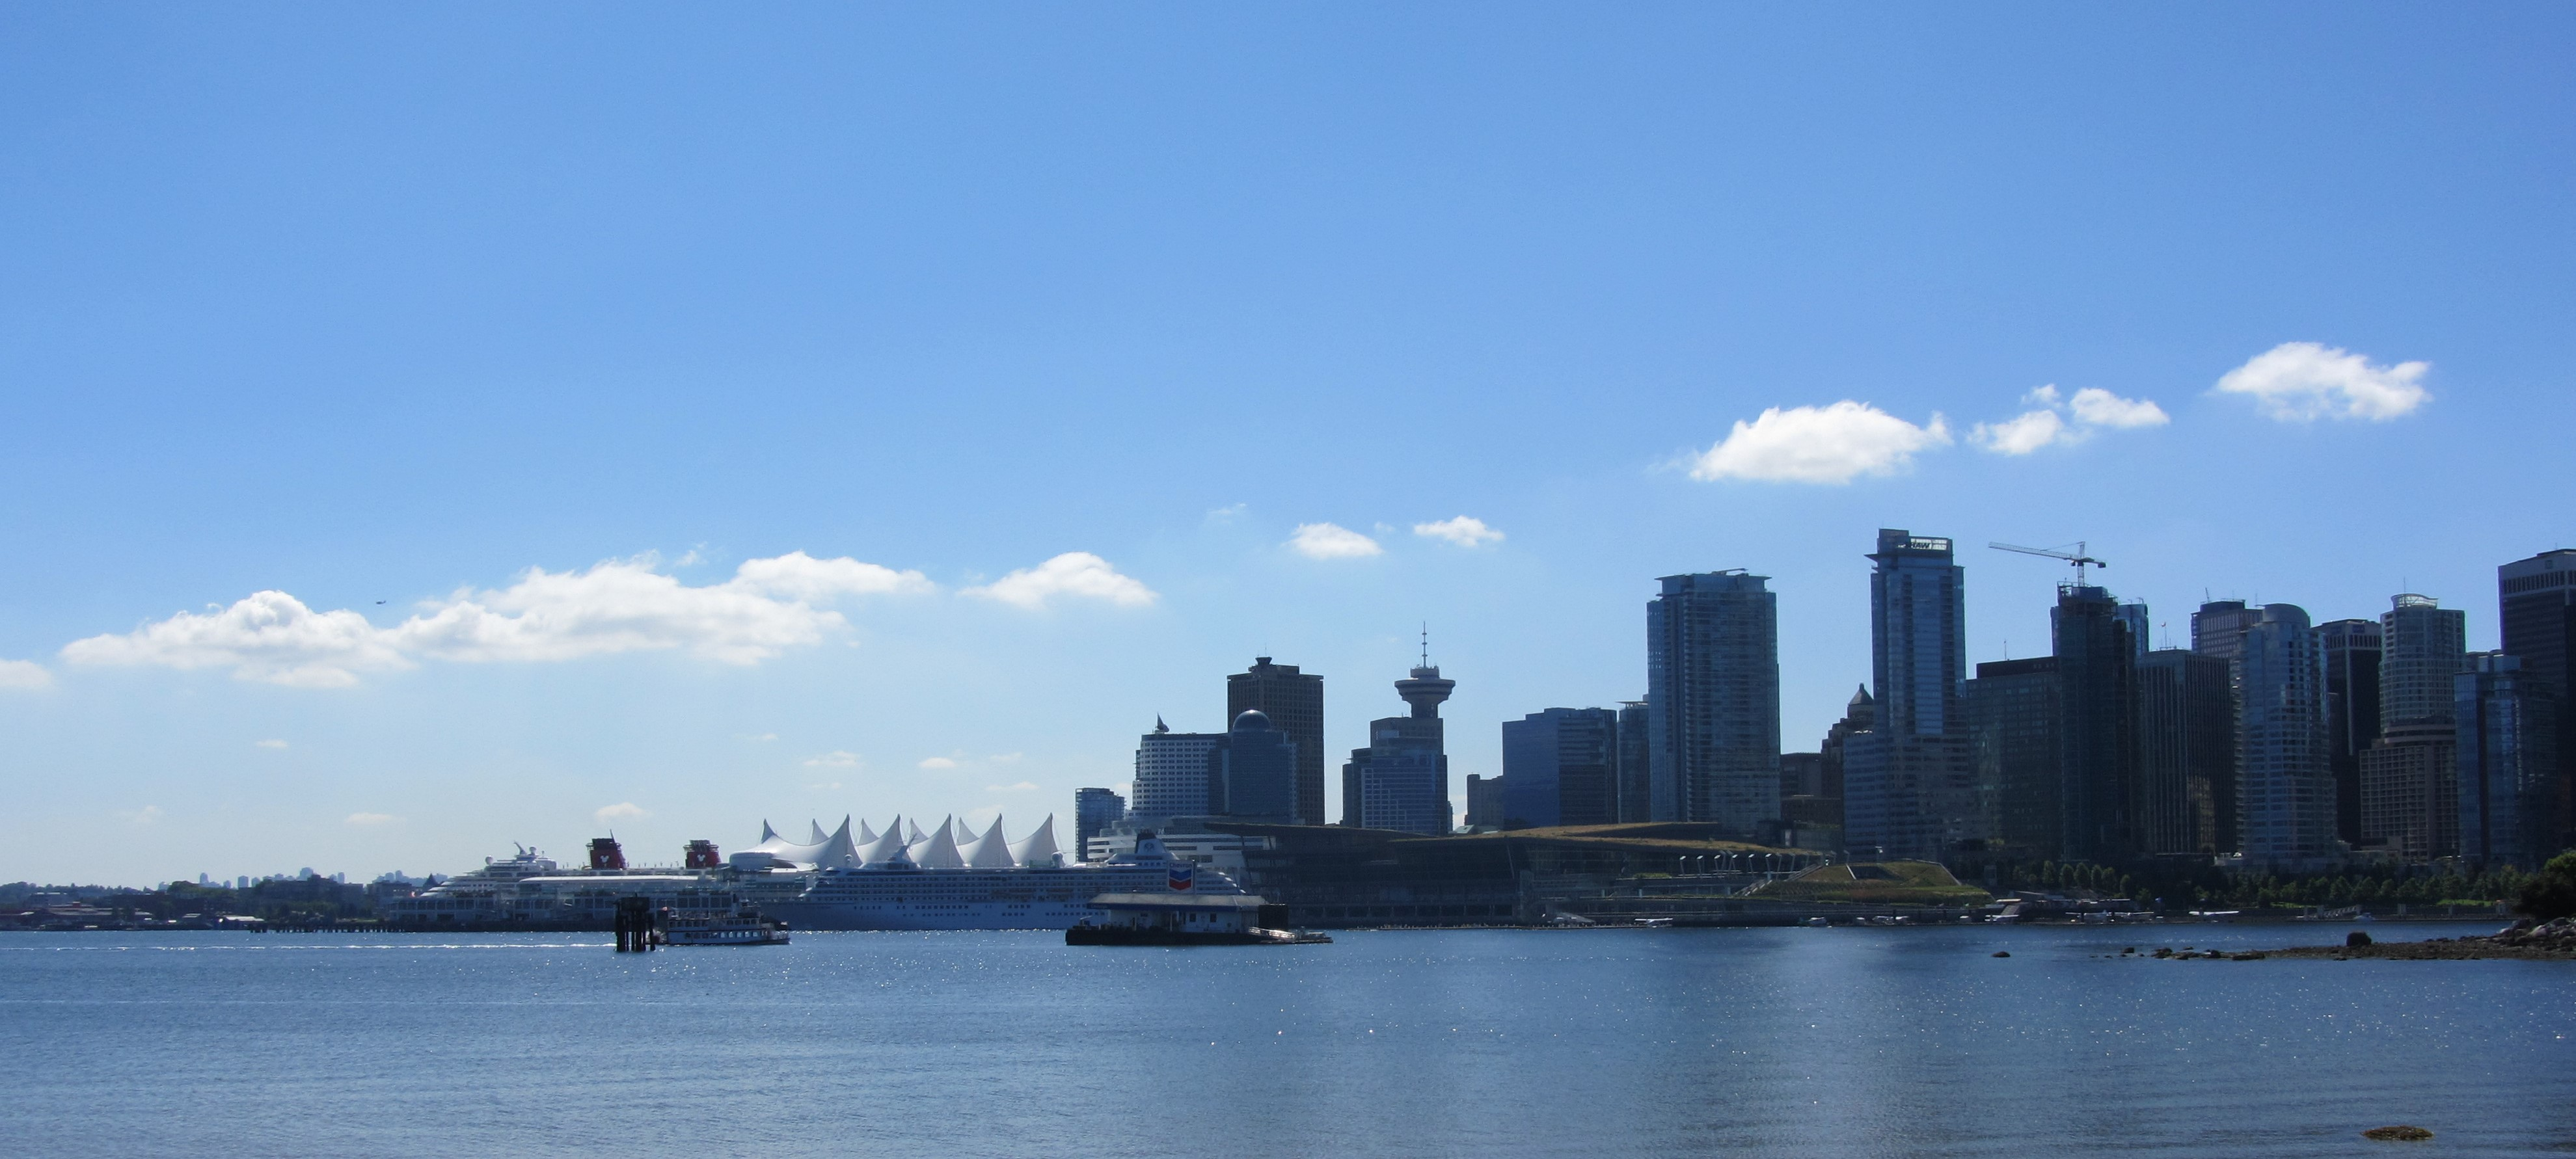

## Table of Contents

## Introduction: Background and Problem

According to the results of the Economist Intelligence Unit survey 2019, Vancouver is one of the best livable cities worldwide. Vancouver ranked 6th of the cities that were included within the survey. Factors included in the survey are living standards, crime, infrastructure, access to education and healthcare, and political and economic stability. The City of Vancouver scores high on safety. Also, the city has amazing public transport; bus lines, passenger ferries, and sky trains makes it extra convenient to get around without taking the car. Public transit fares are not really expensive. Aside from having great public transport, the city has both great employment opportunities and lots of activities to undertake in your spare time. Its location is perfect because of its close proximity to the ocean and mountains.<br>

Because of the popularity of the city and high demand of dwellings, the property price increases. People often move to another city for employment reasons. Also, people who graduated school/ university and are about to start a family may be looking to purchase a house. Safety and an affordable living quarter with good amenities nearby are important to consider where to move. Aside from having a good job after graduating school/ university, you want your kids to grow up in a good and safe neighborhood! Therefore, the main question in this research is: What is the best neighborhood to live in?<br>

At the end, I conclude which neighborhood in Vancouver is the best neighborhood to live in, considering the average housing prices in neighborhoods, crime rate, and specific amenities in neighborhoods. The target audience will be young people who graduated university, have a good job in the city, and who are about to start a family life.


## Data Collection and Data Cleaning

I collect the data from the following sources:<br>

Vancouver Geo Data from Geo Names
(including postal codes, neighborhoods, latitudes, longitudes):
http://download.geonames.org/export/zip/CA.zip

Property Price Data Vancouver Dwellings:
https://opendata.vancouver.ca/explore/dataset/property-tax-report/table/

Vancouver Crime Data from the Vancouver Police Department:
https://geodash.vpd.ca/opendata/

Foursquare venue data on amenities in neighborhoods:
https://foursquare.com/

Vancouver GeoJSON:
https://prototype.metabolismofcities.org/cities/vancouver/maps/boundaries/3642/    

**Import Libraries**

In [1]:
#import packages
import pandas as pd
import csv

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import requests # library to handle requests
import random # library for random number generation

# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

import geocoder # import geocoder

import folium # plotting library

#for webscraping
from bs4 import BeautifulSoup 

from html_table_extractor.extractor import Extractor

# Transform a json file into a pandas data frame
from pandas.io.json import json_normalize #package for flattening json in pandas df


# Import k-means for clustering
from sklearn.cluster import KMeans

# Matplotlib associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#url and zip file retrieval
import urllib.request
import zipfile
import chardet


print("Packages installed and libraries imported.")

Packages installed and libraries imported.


### Postal Codes and Geo Data

In [2]:
geo_path = '.../Coursera/IBM - Data Science/capestone project/capstone project week 4/data collection/postal codes/CanadaPostalCodes.csv'
geo_data = pd.read_csv(geo_path)
geo_data.head(5)

,Postal_Code,Neighborhood,State,City,Latitude,Longitude
0,T0A,Eastern Alberta (St. Paul),Alberta,NaN,54.7660,-111.7174
1,T0B,Wainwright Region (Tofield),Alberta,NaN,53.0727,-111.5816
2,T0C,Central Alberta (Stettler),Alberta,NaN,52.1431,-111.6941
3,T0E,Western Alberta (Jasper),Alberta,NaN,53.6758,-115.0948
4,T0G,North Central Alberta (Slave Lake),Alberta,NaN,55.6993,-114.4529


In [3]:
geo_data = geo_data[geo_data.City == 'Vancouver']   #select Vancouver data only

Now, we have the Vancouver postal code and neighborhood data including the geograpic location (latitude and longitude).

### Property Prices Data

Now, let's get the property prices. The dataset contains lots of different columns. I remove all redundant columns. The columns that contain useful information include the zone category column, the postal code column, and the current land value. The zone category contains the type of property. This could be a one family dwelling, multiple family dwelling, or a two family dwelling. All other categories that are not build for *'living'* will be excluded from the dataset I use in my analysis.

In [4]:
houseprice_path = '.../Coursera/IBM - Data Science/capestone project/capstone project week 4/data collection/Housing data/property_tax_report_csv2016.csv'

houseprice_data = pd.read_csv(houseprice_path)
houseprice_data.head(5)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,NARRATIVE_LEGAL_LINE5,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,024-363-715,LAND,641234060000,64123406,RM-4,Multiple Family Dwelling,A,154,VAP1023,264A,...,ION A NORTH OF GRANDVIEW HWY REF PL,7200000.0,43600.0,2016.0,5760000.0,42300.0,1962.0,1963.0,19625.26,14
1,010-562-559,LAND,650230950000,65023095,RM-4N,Multiple Family Dwelling,A,155,7579,264A,...,"OF LOT E, LOT C, BLOCK 155, PLAN 7",3779000.0,989000.0,2016.0,3569000.0,787000.0,1969.0,1969.0,15488.91,14
2,024-029-785,STRATA,600117080026,60011708,CD-1 (343),Comprehensive Development,26,NaN,LMS3094,185,...,NaN,196000.0,154000.0,2016.0,178000.0,149000.0,1998.0,1998.0,1107.98,26
3,014-814-480,LAND,221735260000,22173526,RS-1,One Family Dwelling,5,16,VAP1369,668,...,NaN,932000.0,28300.0,2016.0,764000.0,23500.0,1958.0,1958.0,3068.76,19
4,013-016-024,LAND,706271960000,70627196,RS-1,One Family Dwelling,14,5,VAP2440,THSL,...,NaN,946000.0,15300.0,2016.0,749000.0,10500.0,1953.0,1953.0,4355.34,23


In [5]:
houseprice_data.columns

Index(['PID', 'LEGAL_TYPE', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
       'ZONE_CATEGORY', 'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
       'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
       'PROPERTY_POSTAL_CODE', 'NARRATIVE_LEGAL_LINE1',
       'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
       'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 'CURRENT_LAND_VALUE',
       'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
       'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
       'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE'],
      dtype='object')

In [6]:
houseprice_data.ZONE_CATEGORY.unique()   #unique types of dwellings

array(['Multiple Family Dwelling', 'Comprehensive Development',
       'One Family Dwelling', 'Two Family Dwelling', 'Commercial',
       'Light Industrial', 'Historic Area', 'Limited Agricultural', nan,
       'Industrial'], dtype=object)

In [7]:
#Add a column with a postal code format like we have for geo data
houseprice_data['Postal_Code'] = houseprice_data['PROPERTY_POSTAL_CODE'].str[0:3]

Some property categories are not used for living, such as the categories in the code below.

In [8]:
#Some properties do not have a living destination
houseprice_data = houseprice_data[(houseprice_data.ZONE_CATEGORY != 'Limited Agricultural') & (houseprice_data.ZONE_CATEGORY != 'Light Industrial') & (houseprice_data.ZONE_CATEGORY != 'Industrial') & (houseprice_data.ZONE_CATEGORY != 'Commercial') & (houseprice_data.ZONE_CATEGORY != 'Comprehensive Development') & (houseprice_data.ZONE_CATEGORY != 'Historic Area')]

houseprice_data.ZONE_CATEGORY.unique()  #remaining categories

array(['Multiple Family Dwelling', 'One Family Dwelling',
       'Two Family Dwelling', nan], dtype=object)

In [9]:
houseprice_data.CURRENT_LAND_VALUE.mean()   #total average value of property in Vancouver

1547111.9645148464

In [10]:
#drop the redundant columns from the dataset
houseprice_data = houseprice_data.drop(columns=['PID', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
       'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
       'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
       'NARRATIVE_LEGAL_LINE1',
       'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
       'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 
       'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
       'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
       'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE'],axis=1)


In [11]:
houseprice_data.head(5)

,LEGAL_TYPE,ZONE_CATEGORY,PROPERTY_POSTAL_CODE,CURRENT_LAND_VALUE,Postal_Code
0,LAND,Multiple Family Dwelling,V5N 1N3,7200000.0,V5N
1,LAND,Multiple Family Dwelling,V5N 1V7,3779000.0,V5N
3,LAND,One Family Dwelling,V5W 3K7,932000.0,V5W
4,LAND,One Family Dwelling,V5R 1Y3,946000.0,V5R
7,STRATA,Multiple Family Dwelling,V6J 2A6,286000.0,V6J


Now calculate the average house price for each neighborhood.

In [12]:
Average_housing_price = houseprice_data.groupby('Postal_Code').CURRENT_LAND_VALUE.mean()
Average_housing_price

Postal_Code
V5K    1.052208e+06
V5L    7.462604e+05
V5M    1.223617e+06
V5N    9.773843e+05
V5P    1.203855e+06
V5R    1.083384e+06
V5S    1.645180e+06
V5T    7.178742e+05
V5V    1.201497e+06
V5W    1.195994e+06
V5X    1.353811e+06
V5Y    1.713144e+06
V5Z    1.277332e+06
V6A    9.016721e+05
V6B    3.454500e+07
V6C    2.480700e+07
V6E    1.136140e+06
V6G    1.095572e+06
V6H    1.262791e+06
V6J    1.434190e+06
V6K    1.422621e+06
V6L    2.747669e+06
V6M    2.931870e+06
V6N    2.566187e+06
V6P    2.004433e+06
V6R    2.742821e+06
V6S    2.379715e+06
V6T    1.373896e+07
V6Z    3.927600e+07
Z 1    1.082000e+06
Z 3    3.934333e+06
Z 5             NaN
Z 9    1.516000e+05
Z10    4.965000e+06
Name: CURRENT_LAND_VALUE, dtype: float64

In [13]:
type(Average_housing_price)

pandas.core.series.Series

In [14]:
Average_housing_price.to_frame()

,CURRENT_LAND_VALUE
Postal_Code,
V5K,1.052208e+06
V5L,7.462604e+05
V5M,1.223617e+06
V5N,9.773843e+05
V5P,1.203855e+06
V5R,1.083384e+06
V5S,1.645180e+06
V5T,7.178742e+05
V5V,1.201497e+06


Now, we have the average housing price for each neighborhood by postal code.

**Merge Average Housing Price Data with Geo Dataset**

This is the final dataset, along with the Foursquare data and Crime data, I will use in the analysis. Property price data for *'North Vancouver'* and *'West Vancouver'* was not readily available, so I exclude these postal codes from the analysis.

In [15]:
Vancouver_dataset = pd.merge(geo_data,Average_housing_price,on='Postal_Code',how='left')
Vancouver_dataset = Vancouver_dataset[Vancouver_dataset.CURRENT_LAND_VALUE.notna()]
Vancouver_dataset.head(5)

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,CURRENT_LAND_VALUE
0,V5K,Vancouver (North Hastings-Sunrise),British Columbia,Vancouver,49.2807,-123.0397,1.052208e+06
1,V5L,Vancouver (North Grandview-Woodlands),British Columbia,Vancouver,49.2795,-123.0667,7.462604e+05
2,V5M,Vancouver (South Hastings-Sunrise / North Renf...,British Columbia,Vancouver,49.2600,-123.0398,1.223617e+06
3,V5N,Vancouver (South Grandview-Woodlands / NE Kens...,British Columbia,Vancouver,49.2551,-123.0667,9.773843e+05
4,V5P,Vancouver (SE Kensington / Victoria-Fraserview),British Columbia,Vancouver,49.2220,-123.0683,1.203855e+06


In [16]:
Vancouver_dataset.dtypes

Postal_Code            object
Neighborhood           object
State                  object
City                   object
Latitude              float64
Longitude             float64
CURRENT_LAND_VALUE    float64
dtype: object

I make the property price more visually attractive, I display the values by 1000s. So the Property price column will become *'(price)k'* or the property price in k. 

In [17]:
Vancouver_dataset['Property Prices'] = ""
Vancouver_dataset.head(5)

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,CURRENT_LAND_VALUE,Property Prices
0,V5K,Vancouver (North Hastings-Sunrise),British Columbia,Vancouver,49.2807,-123.0397,1.052208e+06,
1,V5L,Vancouver (North Grandview-Woodlands),British Columbia,Vancouver,49.2795,-123.0667,7.462604e+05,
2,V5M,Vancouver (South Hastings-Sunrise / North Renf...,British Columbia,Vancouver,49.2600,-123.0398,1.223617e+06,
3,V5N,Vancouver (South Grandview-Woodlands / NE Kens...,British Columbia,Vancouver,49.2551,-123.0667,9.773843e+05,
4,V5P,Vancouver (SE Kensington / Victoria-Fraserview),British Columbia,Vancouver,49.2220,-123.0683,1.203855e+06,


In [18]:
Vancouver_dataset['Property Prices'] = Vancouver_dataset['CURRENT_LAND_VALUE']/1000

In [19]:
Vancouver_dataset = Vancouver_dataset.drop(['CURRENT_LAND_VALUE'], axis=1)

In [20]:
Vancouver_dataset

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,Property Prices
0,V5K,Vancouver (North Hastings-Sunrise),British Columbia,Vancouver,49.2807,-123.0397,1052.207532
1,V5L,Vancouver (North Grandview-Woodlands),British Columbia,Vancouver,49.2795,-123.0667,746.260426
2,V5M,Vancouver (South Hastings-Sunrise / North Renf...,British Columbia,Vancouver,49.2600,-123.0398,1223.617191
3,V5N,Vancouver (South Grandview-Woodlands / NE Kens...,British Columbia,Vancouver,49.2551,-123.0667,977.384303
4,V5P,Vancouver (SE Kensington / Victoria-Fraserview),British Columbia,Vancouver,49.2220,-123.0683,1203.854742
5,V5R,Vancouver (South Renfrew-Collingwood),British Columbia,Vancouver,49.2397,-123.0407,1083.383626
6,V5S,Vancouver (Killarney),British Columbia,Vancouver,49.2175,-123.0380,1645.179569
7,V5T,Vancouver (East Mount Pleasant),British Columbia,Vancouver,49.2620,-123.0923,717.874244
8,V5V,Vancouver (West Kensington / NE Riley Park-Lit...,British Columbia,Vancouver,49.2480,-123.0913,1201.496708
9,V5W,Vancouver (SE Riley Park-Little Mountain / SW ...,British Columbia,Vancouver,49.2327,-123.0917,1195.994199


Also, the neighborhoods should get the right name.

In [21]:
#rename neighborhoods to the correct name
Vancouver_dataset['Neighborhood'] = Vancouver_dataset['Neighborhood'].replace({
'Vancouver (North Hastings-Sunrise)':'Hastings-Sunrise',
'Vancouver (North Grandview-Woodlands)':'Grandview-Woodland',
'Vancouver (South Hastings-Sunrise / North Renfrew-Collingwood)':'Kensington-Cedar Cottage',
'Vancouver (South Grandview-Woodlands / NE Kensington)':'South Grandview-Woodlands / NE Kensington',
'Vancouver (SE Kensington / Victoria-Fraserview)':'Victoria-Fraserview',
'Vancouver (South Renfrew-Collingwood)':'Renfrew-Collingwood',
'Vancouver (Killarney)':'Killarney',
'Vancouver (East Mount Pleasant)':'Mount Pleasant',
'Vancouver (West Kensington / NE Riley Park-Little Mountain)':'Riley Park',
'Vancouver (SE Riley Park-Little Mountain / SW Kensington / NE Oakridge / North Sunset)':'Sunset',
'Vancouver (SE Oakridge / East Marpole / South Sunset)':'Marpole',
'Vancouver (West Mount Pleasant / West Riley Park-Little Mountain)':'West Riley Park-Little Mountain',
'Vancouver (East Fairview / South Cambie)':'South Cambie',
'Vancouver (Strathcona / Chinatown / Downtown Eastside)':'Strathcona',
'Vancouver (NE Downtown / Harbour Centre / Gastown / Yaletown)':'Downtown Eastside',
'Vancouver (Waterfront / Coal Harbour / Canada Place)':'Downtown',
'Vancouver (South West End)':'West End',
'Vancouver (North West End / Stanley Park)':'Stanley Park',
'Vancouver (West Fairview / Granville Island / NE Shaughnessy)':'Fairview',
'Vancouver (NW Shaughnessy / East Kitsilano / Quilchena)':'Shaughnessy',
'Vancouver (Central Kitsilano)':'Kitsilano',
'Vancouver (NW Arbutus Ridge)':'Arbutus Ridge',
'Vancouver (South Shaughnessy / NW Oakridge / NE Kerrisdale / SE Arbutus Ridge)':'Oakridge',
'Vancouver (Dunbar-Southlands / Musqueam)':'Dunbar Southlands',
'Vancouver (SE Kerrisdale / SW Oakridge / West Marpole)':'Kerrisdale',
'Vancouver (West Kitsilano / Jericho)':'West Point Grey',
'Vancouver (Chaldecutt / South University Endowment Lands)':'University Endowment Lands',
'Vancouver (UBC)':'UBC',
'Vancouver (SW Downtown)':'Downtown'
    
})

In [22]:
Vancouver_dataset

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,Property Prices
0,V5K,Hastings-Sunrise,British Columbia,Vancouver,49.2807,-123.0397,1052.207532
1,V5L,Grandview-Woodland,British Columbia,Vancouver,49.2795,-123.0667,746.260426
2,V5M,Kensington-Cedar Cottage,British Columbia,Vancouver,49.2600,-123.0398,1223.617191
3,V5N,South Grandview-Woodlands / NE Kensington,British Columbia,Vancouver,49.2551,-123.0667,977.384303
4,V5P,Victoria-Fraserview,British Columbia,Vancouver,49.2220,-123.0683,1203.854742
5,V5R,Renfrew-Collingwood,British Columbia,Vancouver,49.2397,-123.0407,1083.383626
6,V5S,Killarney,British Columbia,Vancouver,49.2175,-123.0380,1645.179569
7,V5T,Mount Pleasant,British Columbia,Vancouver,49.2620,-123.0923,717.874244
8,V5V,Riley Park,British Columbia,Vancouver,49.2480,-123.0913,1201.496708
9,V5W,Sunset,British Columbia,Vancouver,49.2327,-123.0917,1195.994199


The property prices downtown are quite high; this would not be the best place to buy a property. Therefore, I exclude Vancouver Downtown from the analysis.

In [23]:
Vancouver_dataset = Vancouver_dataset[(Vancouver_dataset.Neighborhood != 'Downtown') & (Vancouver_dataset.Neighborhood != 'Downtown Eastside') & (Vancouver_dataset.Neighborhood != 'UBC')]
Vancouver_dataset    

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,Property Prices
0,V5K,Hastings-Sunrise,British Columbia,Vancouver,49.2807,-123.0397,1052.207532
1,V5L,Grandview-Woodland,British Columbia,Vancouver,49.2795,-123.0667,746.260426
2,V5M,Kensington-Cedar Cottage,British Columbia,Vancouver,49.2600,-123.0398,1223.617191
3,V5N,South Grandview-Woodlands / NE Kensington,British Columbia,Vancouver,49.2551,-123.0667,977.384303
4,V5P,Victoria-Fraserview,British Columbia,Vancouver,49.2220,-123.0683,1203.854742
5,V5R,Renfrew-Collingwood,British Columbia,Vancouver,49.2397,-123.0407,1083.383626
6,V5S,Killarney,British Columbia,Vancouver,49.2175,-123.0380,1645.179569
7,V5T,Mount Pleasant,British Columbia,Vancouver,49.2620,-123.0923,717.874244
8,V5V,Riley Park,British Columbia,Vancouver,49.2480,-123.0913,1201.496708
9,V5W,Sunset,British Columbia,Vancouver,49.2327,-123.0917,1195.994199


In the map below, I explore the Vancouver neighborhood distribution we have.

In [24]:
#Determine map coordinates
address = 'Vancouver, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.2608724 -123.1139529


In [25]:
map_Vancouver_dataset = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, postalcode in zip(Vancouver_dataset['Latitude'], Vancouver_dataset['Longitude'], Vancouver_dataset['Postal_Code']):
    label = '{}'.format(postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver_dataset)  

map_Vancouver_dataset

### Foursquare

Now, let's gather data on venues in Vancouver from Foursquare. Vancouver Downtown is excluded because of the very high house prices. 

In [26]:
#Foursquare
CLIENT_ID = '2NZNWQRHZPM1X0XVOZATYFBDOOFBPQNP4XSP3MNNAOWFJYTW' # your Foursquare ID
CLIENT_SECRET = '0FDT4C2ZDYFA0F5UDL2IORKUKPREKPMJIDODLVZ3WNOWJ2VF' # your Foursquare Secret
VERSION = '20190425' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2NZNWQRHZPM1X0XVOZATYFBDOOFBPQNP4XSP3MNNAOWFJYTW
CLIENT_SECRET:0FDT4C2ZDYFA0F5UDL2IORKUKPREKPMJIDODLVZ3WNOWJ2VF


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
Vancouver_Venues = getNearbyVenues(names=Vancouver_dataset['Neighborhood'],latitudes=Vancouver_dataset['Latitude'],longitudes=Vancouver_dataset['Longitude'])

Hastings-Sunrise
Grandview-Woodland
Kensington-Cedar Cottage
South Grandview-Woodlands / NE Kensington
Victoria-Fraserview
Renfrew-Collingwood
Killarney
Mount Pleasant
Riley Park
Sunset
Marpole
West Riley Park-Little Mountain
South Cambie
Strathcona
West End
Stanley Park
Fairview
Shaughnessy
Kitsilano
Arbutus Ridge
Oakridge
Dunbar Southlands
Kerrisdale
West Point Grey
University Endowment Lands


In [29]:
Vancouver_Venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hastings-Sunrise,49.2807,-123.0397,The Fair at the PNE,49.282971,-123.042109,Fair
1,Hastings-Sunrise,49.2807,-123.0397,Wooden Roller Coaster,49.281744,-123.035128,Theme Park Ride / Attraction
2,Hastings-Sunrise,49.2807,-123.0397,Livestock Barns,49.284037,-123.039278,Farm
3,Hastings-Sunrise,49.2807,-123.0397,Playland,49.281924,-123.036258,Theme Park
4,Hastings-Sunrise,49.2807,-123.0397,Italia Bakery,49.280940,-123.045885,Bakery


The dataset above includes all venues for neighborhoods in Vancouver. 

In [30]:
#What are the unique venue categories we have retrieved from Foursquare?
Vancouver_Venues['Venue Category'].unique()

array(['Fair', 'Theme Park Ride / Attraction', 'Farm', 'Theme Park',
       'Bakery', 'Beer Garden', 'Soccer Field', 'Amphitheater',
       'Gas Station', 'Park', 'Event Space', 'Vietnamese Restaurant',
       'Sandwich Place', 'Sushi Restaurant', 'Stadium',
       'Arts & Crafts Store', 'Inn', 'Pizza Place',
       'Portuguese Restaurant', 'Deli / Bodega', 'Coffee Shop',
       'Italian Restaurant', 'Theater', 'Brewery', 'Fried Chicken Joint',
       'Thai Restaurant', 'Breakfast Spot', 'Café', 'Japanese Restaurant',
       'Athletics & Sports', 'Thrift / Vintage Store',
       'Electronics Store', 'Chinese Restaurant', 'Indian Restaurant',
       'Asian Restaurant', 'Fish & Chips Shop', 'Convenience Store',
       'Bus Stop', 'Music Venue', 'Market', 'Jewelry Store', 'Pet Store',
       'Liquor Store', 'Office', 'Grocery Store',
       'Paper / Office Supplies Store', 'Mexican Restaurant',
       'Sporting Goods Shop', 'Salad Place', 'Furniture / Home Store',
       'Metro Station', 

In [31]:
len(Vancouver_Venues['Venue Category'].unique())

136

I exclude restaurants and more touristic attractions from the venues, because these venues are less relevant to determine the best neighborhood to live in. There are lots of restaurants in Vancouver and this could give a distorted picture of reality. The venue categories below include the most daily used venues, such as grocery shopping, leisure activities, public transport, etc. 

In [32]:
regular_category = ['Fair', 'Theme Park Ride / Attraction', 'Farm', 'Theme Park',
       'Bakery', 'Soccer Field', 'Amphitheater',
       'Gas Station', 'Park', 'Event Space', 
       'Sandwich Place', 'Stadium',
       'Arts & Crafts Store', 'Pizza Place',
       'Coffee Shop',
       'Fried Chicken Joint',
       'Café', 
       'Athletics & Sports', 'Thrift / Vintage Store',
       'Electronics Store', 
       'Fish & Chips Shop', 'Convenience Store',
       'Bus Stop', 'Music Venue', 'Market', 'Jewelry Store', 'Pet Store',
       'Liquor Store', 'Office', 'Grocery Store',
       'Paper / Office Supplies Store', 
       'Sporting Goods Shop', 'Salad Place', 'Furniture / Home Store',
       'Metro Station', 'Storage Facility', 'Gym',
       'Farmers Market', 'Gym / Fitness Center', 'Concert Hall',
       'Bookstore', 'Skating Rink', 'Church', 'Lake', 'Dog Run', 'Beach',
       'Bank', 'Fish Market',
       'Pharmacy', 'Post Office', 'Bus Station', 'Bar',
       'Shopping Mall', 'Juice Bar',
       'Salon / Barbershop', 'Outdoor Sculpture', 
       'Pub', 'Cocktail Bar', 'Sports Bar', 'Ice Cream Shop',
       'Gourmet Shop',
       'Tea Room', 'Dessert Shop', 'Field',
       'Light Rail Station', 'Cafeteria', 'Bubble Tea Shop', 'Food Truck',
       'Pie Shop', 'Cheese Shop',
       'Miscellaneous Shop', 
       'Burger Joint', 'Yoga Studio', 
       'Wine Shop', "Women's Store",
       'Movie Theater', 'Cosmetics Shop',
       'Spa', 'Clothing Store', 
       'Gastropub', 'Garden', 'Trail',
       'Playground', 'Physical Therapist',
       'Tennis Court', 'Food & Drink Shop',
       'Bagel Shop', 'Frozen Yogurt Shop',
       'Video Store', 'Pool']
Vancouver_Venues = Vancouver_Venues[Vancouver_Venues['Venue Category'].isin(regular_category)]

In [33]:
# one hot encoding
Vancouver_category_dummies = pd.get_dummies(Vancouver_Venues[['Venue Category']])

# add neighborhood column back to dataframe
Vancouver_category_dummies['Neighborhood'] = Vancouver_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Vancouver_category_dummies.columns[-1]] + list(Vancouver_category_dummies.columns[:-1])
Vancouver_category_dummies = Vancouver_category_dummies[fixed_columns]

Vancouver_category_dummies.head()

,Neighborhood,Venue Category_Amphitheater,Venue Category_Arts & Crafts Store,Venue Category_Athletics & Sports,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Beach,Venue Category_Bookstore,...,Venue Category_Tea Room,Venue Category_Tennis Court,Venue Category_Theme Park,Venue Category_Theme Park Ride / Attraction,Venue Category_Thrift / Vintage Store,Venue Category_Trail,Venue Category_Video Store,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hastings-Sunrise,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Hastings-Sunrise,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Vancouver_categories_grouped = Vancouver_category_dummies.groupby('Neighborhood').mean().reset_index()
Vancouver_categories_grouped.tail(5)

,Neighborhood,Venue Category_Amphitheater,Venue Category_Arts & Crafts Store,Venue Category_Athletics & Sports,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Beach,Venue Category_Bookstore,...,Venue Category_Tea Room,Venue Category_Tennis Court,Venue Category_Theme Park,Venue Category_Theme Park Ride / Attraction,Venue Category_Thrift / Vintage Store,Venue Category_Trail,Venue Category_Video Store,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
19,University Endowment Lands,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
20,Victoria-Fraserview,0.0,0.0,0.0,0.0,0.000000,0.066667,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
21,West End,0.0,0.0,0.0,0.0,0.088889,0.000000,0.0,0.0,0.044444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.022222,0.022222
22,West Point Grey,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
23,West Riley Park-Little Mountain,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
# Create a table with the top 3 venues per neighborhood
top_venues = 5
columns = ['Neighborhood']
indicators = ['st', 'nd', 'rd']

for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Vancouver_categories_grouped['Neighborhood']

for ind in np.arange(Vancouver_categories_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Vancouver_categories_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arbutus Ridge,Venue Category_Bakery,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Dog Run,Venue Category_Electronics Store
1,Fairview,Venue Category_Pizza Place,Venue Category_Physical Therapist,Venue Category_Bakery,Venue Category_Pet Store,Venue Category_Fish & Chips Shop
2,Grandview-Woodland,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Convenience Store,Venue Category_Fried Chicken Joint,Venue Category_Pizza Place
3,Hastings-Sunrise,Venue Category_Theme Park Ride / Attraction,Venue Category_Event Space,Venue Category_Theme Park,Venue Category_Amphitheater,Venue Category_Stadium
4,Kensington-Cedar Cottage,Venue Category_Pizza Place,Venue Category_Coffee Shop,Venue Category_Bus Stop,Venue Category_Sporting Goods Shop,Venue Category_Grocery Store


In [37]:
#additional data cleaning
neighborhoods_venues_sorted['1st Most Common Venue'] = neighborhoods_venues_sorted['1st Most Common Venue'].str[15:]
neighborhoods_venues_sorted['2nd Most Common Venue'] = neighborhoods_venues_sorted['2nd Most Common Venue'].str[15:]
neighborhoods_venues_sorted['3rd Most Common Venue'] = neighborhoods_venues_sorted['3rd Most Common Venue'].str[15:]
neighborhoods_venues_sorted['4th Most Common Venue'] = neighborhoods_venues_sorted['4th Most Common Venue'].str[15:]
neighborhoods_venues_sorted['5th Most Common Venue'] = neighborhoods_venues_sorted['5th Most Common Venue'].str[15:]


In [38]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arbutus Ridge,Bakery,Yoga Studio,Food & Drink Shop,Dog Run,Electronics Store
1,Fairview,Pizza Place,Physical Therapist,Bakery,Pet Store,Fish & Chips Shop
2,Grandview-Woodland,Café,Coffee Shop,Convenience Store,Fried Chicken Joint,Pizza Place
3,Hastings-Sunrise,Theme Park Ride / Attraction,Event Space,Theme Park,Amphitheater,Stadium
4,Kensington-Cedar Cottage,Pizza Place,Coffee Shop,Bus Stop,Sporting Goods Shop,Grocery Store


The dataset above displays the top 10 venues for each neighborhood. I printed the first 5 rows of the dataset.

### Vancouver Crime Data

To evaluate the safest neighborhood in Vancouver, I gathered Vancouver crime data. I retrieved the data from the Vancouver Police Department crime data website. All types of crime from 2003 till 2021 have been registered. I only use a subset of the data; this is almost the most recent data (all crimes recorded over 2020). I count the number of total crimes in 2020 for all neighborhoods. 

In [39]:
path_crime_data = '.../Coursera/IBM - Data Science/capestone project/capstone project week 4/data collection/Vancouver Crime data/crimedata_csv_all_years.csv'

crime_data = pd.read_csv(path_crime_data)

In [40]:
crime_data.head(5)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,Latitude,Longitude
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,49.225867,-123.126826
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,49.266442,-123.129366
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,49.284715,-123.122824
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,49.284715,-123.122824
4,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,49.284715,-123.122824


In [41]:
crime_data = crime_data[crime_data.YEAR.isin(['2020'])]   #the most recent full year

In [42]:
count_crime = crime_data.NEIGHBOURHOOD.value_counts()  #count all entries per district

In [43]:
crime = count_crime.to_frame()
crime.reset_index(inplace=True)

In [44]:
crime = crime.rename(columns={'index':'NEIGHBOURHOOD','NEIGHBOURHOOD':'Count'})
crime['NEIGHBOURHOOD'] = crime['NEIGHBOURHOOD'].replace({'Central Business District':'Downtown','Dunbar-Southlands':'Dunbar Southlands'})
crime

,NEIGHBOURHOOD,Count
0,Downtown,7708
1,West End,2299
2,Mount Pleasant,1930
3,Renfrew-Collingwood,1792
4,Fairview,1783
5,Strathcona,1707
6,Kitsilano,1561
7,Grandview-Woodland,1458
8,Kensington-Cedar Cottage,1287
9,Hastings-Sunrise,1036


------------------------------------------------------------------------------------------------------------------------------

### Methodology

This section includes the exploratory data analysis, any inferential statistical testing, and machine learning techniques that were used and why these techniques were used.

##### Descriptive Statistics, or Exploratory Data Analysis

In this part, I describe the distribution of property prices, the count and distribution of most common venues, and the crime numbers per neighborhood. Also, I determine the optimal number of clusters with machine learning. 

**Property Prices**

In [45]:
Vancouver_dataset.head(5)

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,Property Prices
0,V5K,Hastings-Sunrise,British Columbia,Vancouver,49.2807,-123.0397,1052.207532
1,V5L,Grandview-Woodland,British Columbia,Vancouver,49.2795,-123.0667,746.260426
2,V5M,Kensington-Cedar Cottage,British Columbia,Vancouver,49.2600,-123.0398,1223.617191
3,V5N,South Grandview-Woodlands / NE Kensington,British Columbia,Vancouver,49.2551,-123.0667,977.384303
4,V5P,Victoria-Fraserview,British Columbia,Vancouver,49.2220,-123.0683,1203.854742


In [46]:
len(Vancouver_dataset.Neighborhood)

25

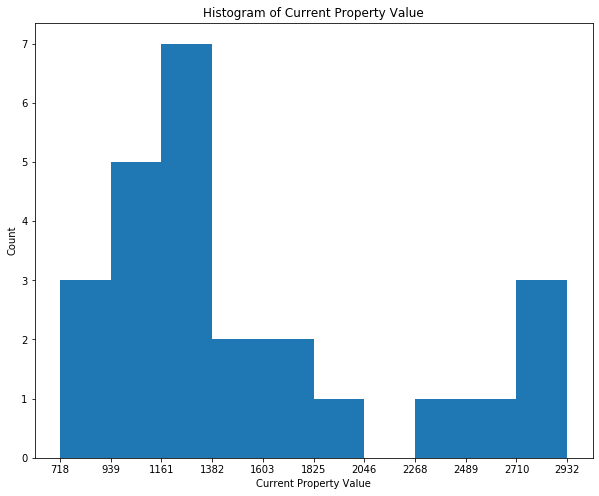

In [47]:
#distribution of property value
count, bin_edges = np.histogram(Vancouver_dataset['Property Prices'],10)

Vancouver_dataset['Property Prices'].plot(kind='hist', figsize=(10, 8), xticks=bin_edges)

plt.title('Histogram of Current Property Value') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Current Property Value') # add x-label

plt.show()

In [48]:
Vancouver_dataset['Property Prices'].describe()

count      25.000000
mean     1520.688779
std       656.271239
min       717.874244
25%      1095.572374
50%      1262.790735
75%      1713.143681
max      2931.869732
Name: Property Prices, dtype: float64

This is how the property prices are distributed for all neighborhoods.

**Foursquare**

I use machine learning to get the optimal number of clusters. I create a scree plot to determine the cluster maximum. The elbow point in the plot is the optimal number of clusters. Each cluster has a unique set of venues and each neighborhood has a unique set of venues. 

In [49]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arbutus Ridge,Bakery,Yoga Studio,Food & Drink Shop,Dog Run,Electronics Store
1,Fairview,Pizza Place,Physical Therapist,Bakery,Pet Store,Fish & Chips Shop
2,Grandview-Woodland,Café,Coffee Shop,Convenience Store,Fried Chicken Joint,Pizza Place
3,Hastings-Sunrise,Theme Park Ride / Attraction,Event Space,Theme Park,Amphitheater,Stadium
4,Kensington-Cedar Cottage,Pizza Place,Coffee Shop,Bus Stop,Sporting Goods Shop,Grocery Store


In [50]:
Vancouver_clustering = Vancouver_categories_grouped.drop('Neighborhood',1)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(Vancouver_clustering)
data_transformed = mms.transform(Vancouver_clustering)

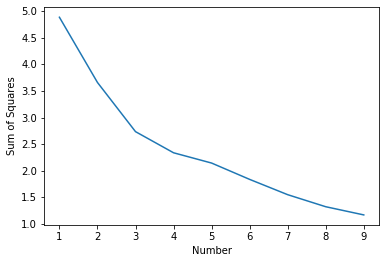

In [52]:
#find the optimal number of clusters
cluster_maximum = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state=4)
    kmeans.fit(Vancouver_clustering)
    cluster_maximum.append(kmeans.inertia_)

plt.plot(np.arange(1, 10), cluster_maximum)
plt.xlabel("Number")
plt.ylabel("Sum of Squares")
plt.show()

So, the optimal number of clusters equals 3. Now, I can divide the neighborhoods into venue clusters. Each venue cluster has its unique top 5 of most common venues (locations that people use on daily basis in a certain area). A neighborhood with a different set of common venues is assigned to a different cluster.

In [53]:
# set number of clusters - The optimal number of clusters is determined at the end of this notebook - Clustering Analysis: Determine the Optimal Clusters.
kclusters = 3

# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Vancouver_clustering)

# summary cluster labels generated for the rows
kmeans.labels_[0:10]

array([2, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [54]:
# add cluster labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,Arbutus Ridge,Bakery,Yoga Studio,Food & Drink Shop,Dog Run,Electronics Store
1,0,Fairview,Pizza Place,Physical Therapist,Bakery,Pet Store,Fish & Chips Shop
2,0,Grandview-Woodland,Café,Coffee Shop,Convenience Store,Fried Chicken Joint,Pizza Place


In [55]:
Vancouver_merged = pd.merge(Vancouver_dataset,neighborhoods_venues_sorted,on='Neighborhood',how='left')

Vancouver_merged

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,Property Prices,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,V5K,Hastings-Sunrise,British Columbia,Vancouver,49.2807,-123.0397,1052.207532,0.0,Theme Park Ride / Attraction,Event Space,Theme Park,Amphitheater,Stadium
1,V5L,Grandview-Woodland,British Columbia,Vancouver,49.2795,-123.0667,746.260426,0.0,Café,Coffee Shop,Convenience Store,Fried Chicken Joint,Pizza Place
2,V5M,Kensington-Cedar Cottage,British Columbia,Vancouver,49.2600,-123.0398,1223.617191,0.0,Pizza Place,Coffee Shop,Bus Stop,Sporting Goods Shop,Grocery Store
3,V5N,South Grandview-Woodlands / NE Kensington,British Columbia,Vancouver,49.2551,-123.0667,977.384303,0.0,Café,Gym / Fitness Center,Lake,Music Venue,Farmers Market
4,V5P,Victoria-Fraserview,British Columbia,Vancouver,49.2220,-123.0683,1203.854742,0.0,Pizza Place,Fish Market,Pharmacy,Pet Store,Post Office
5,V5R,Renfrew-Collingwood,British Columbia,Vancouver,49.2397,-123.0407,1083.383626,0.0,Bus Stop,Pharmacy,Park,Bar,Fish & Chips Shop
6,V5S,Killarney,British Columbia,Vancouver,49.2175,-123.0380,1645.179569,0.0,Bus Stop,Liquor Store,Coffee Shop,Farmers Market,Salon / Barbershop
7,V5T,Mount Pleasant,British Columbia,Vancouver,49.2620,-123.0923,717.874244,0.0,Pizza Place,Sports Bar,Park,Outdoor Sculpture,Music Venue
8,V5V,Riley Park,British Columbia,Vancouver,49.2480,-123.0913,1201.496708,0.0,Coffee Shop,Convenience Store,Café,Ice Cream Shop,Liquor Store
9,V5W,Sunset,British Columbia,Vancouver,49.2327,-123.0917,1195.994199,0.0,Bus Stop,Coffee Shop,Fried Chicken Joint,Dessert Shop,Sandwich Place


In [56]:
Vancouver_merged['Cluster Labels'].unique()

array([ 0.,  1.,  2., nan])

In [57]:
Vancouver_merged = Vancouver_merged[Vancouver_merged['Cluster Labels'].notna()]

In [58]:
Vancouver_merged['Cluster Labels'] = Vancouver_merged['Cluster Labels'].astype(int)

C:\Users\Lydia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
Vancouver_merged.dtypes

Postal_Code               object
Neighborhood              object
State                     object
City                      object
Latitude                 float64
Longitude                float64
Property Prices          float64
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

**Types of Most Common Venues**

This section is a descriptive presentation of the most common venues: the number of venues that are most common in the first place, the number of venues that are most common in the second place, and the number of vanues that are most common in the third place.

In [60]:
most_common_venues = Vancouver_merged['1st Most Common Venue'].value_counts()
most_common_venues = most_common_venues.to_frame()
most_common_venues.reset_index(inplace=True)
most_common_venues = most_common_venues.rename(columns={'index':'Venue','1st Most Common Venue':'Count'})
most_common_venues

,Venue,Count
0,Pizza Place,4
1,Bus Stop,4
2,Café,3
3,Park,2
4,Coffee Shop,2
5,Dessert Shop,2
6,Pool,1
7,Electronics Store,1
8,Theme Park Ride / Attraction,1
9,Bakery,1


In [61]:
type(most_common_venues)

pandas.core.frame.DataFrame

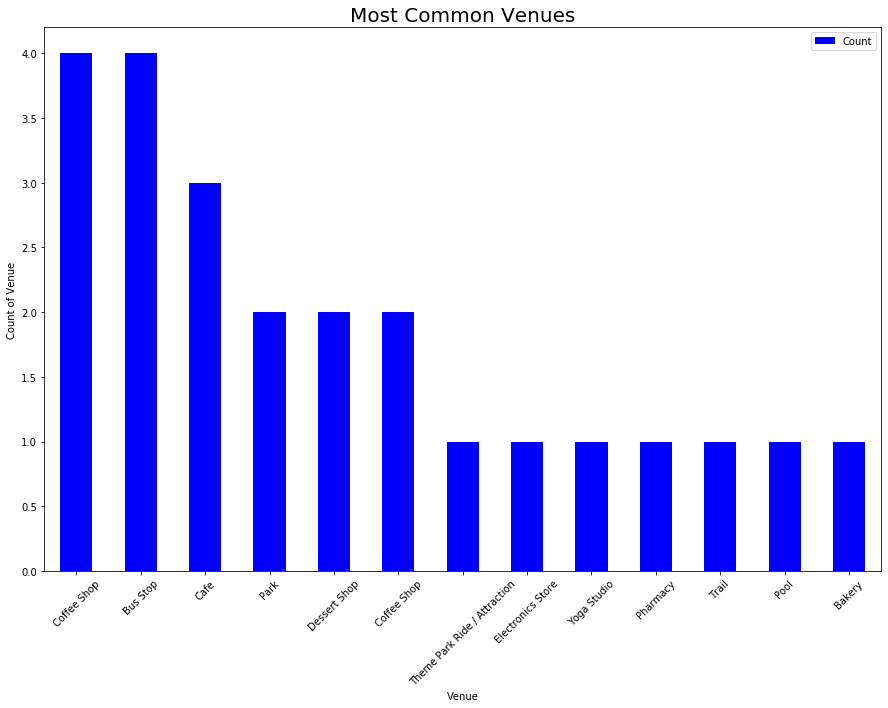

In [62]:
x = ['Coffee Shop','Bus Stop','Cafe','Park','Dessert Shop','Coffee Shop','Theme Park Ride / Attraction','Electronics Store','Yoga Studio','Pharmacy','Trail','Pool','Bakery']

most_common_venues = most_common_venues.plot(kind='bar', color='blue',figsize=(15,10))
most_common_venues.set_xticklabels(x)  

plt.xlabel('Venue') # add x-label to the plot
plt.ylabel('Count of Venue') # add y-label to the plot
plt.title('Most Common Venues', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

In [63]:
second_common_venues = Vancouver_merged['2nd Most Common Venue'].value_counts()
second_common_venues = second_common_venues.to_frame()
second_common_venues.reset_index(inplace=True)
second_common_venues = second_common_venues.rename(columns={'index':'Venue','2nd Most Common Venue':'Count'})
second_common_venues

,Venue,Count
0,Coffee Shop,6
1,Park,3
2,Yoga Studio,2
3,Event Space,1
4,Liquor Store,1
5,Convenience Store,1
6,Garden,1
7,Sports Bar,1
8,Pharmacy,1
9,Physical Therapist,1


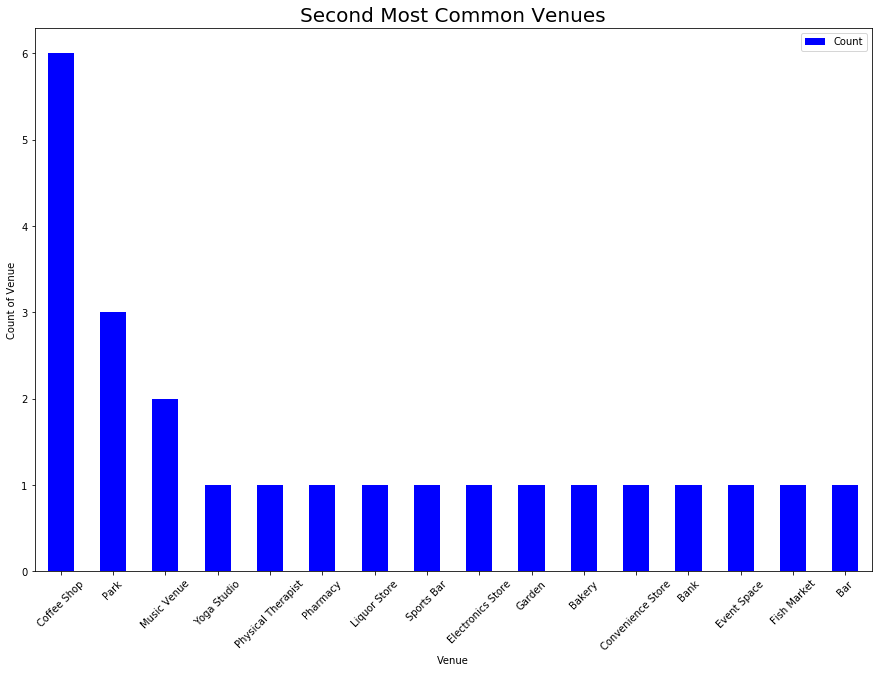

In [64]:
x = ['Coffee Shop','Park','Music Venue','Yoga Studio','Physical Therapist','Pharmacy','Liquor Store','Sports Bar','Electronics Store','Garden','Bakery','Convenience Store','Bank','Event Space','Fish Market','Bar']

second_common_venues = second_common_venues.plot(kind='bar', color='blue',figsize=(15,10))
second_common_venues.set_xticklabels(x)  

plt.xlabel('Venue') # add x-label to the plot
plt.ylabel('Count of Venue') # add y-label to the plot
plt.title('Second Most Common Venues', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

In [65]:
third_common_venues = Vancouver_merged['3rd Most Common Venue'].value_counts()
third_common_venues = third_common_venues.to_frame()
third_common_venues.reset_index(inplace=True)
third_common_venues = third_common_venues.rename(columns={'index':'Venue','3rd Most Common Venue':'Count'})
third_common_venues

,Venue,Count
0,Coffee Shop,4
1,Yoga Studio,2
2,Park,2
3,Food & Drink Shop,1
4,Theme Park,1
5,Bus Stop,1
6,Pub,1
7,Café,1
8,Fish Market,1
9,Sandwich Place,1


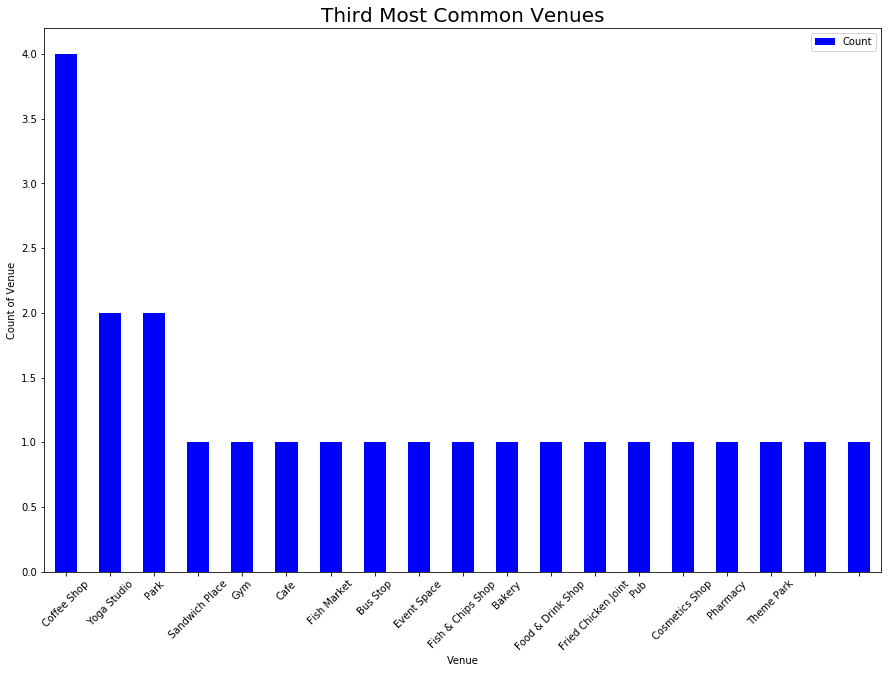

In [66]:
x = ['Coffee Shop','Yoga Studio','Park','Sandwich Place','Gym','Cafe','Fish Market','Bus Stop','Event Space','Fish & Chips Shop','Bakery','Food & Drink Shop','Fried Chicken Joint','Pub','Cosmetics Shop','Pharmacy','Theme Park']

third_common_venues = third_common_venues.plot(kind='bar', color='blue',figsize=(15,10))
third_common_venues.set_xticklabels(x)  

plt.xlabel('Venue') # add x-label to the plot
plt.ylabel('Count of Venue') # add y-label to the plot
plt.title('Third Most Common Venues', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

A coffee shop is the most common venue for neighborhoods that are on the first, second, or third position of the top 5 venues. Parks and Yoga Studios are also very common within the top venues.

**Neighborhoods with the Most Crime**

In [67]:
crime

,NEIGHBOURHOOD,Count
0,Downtown,7708
1,West End,2299
2,Mount Pleasant,1930
3,Renfrew-Collingwood,1792
4,Fairview,1783
5,Strathcona,1707
6,Kitsilano,1561
7,Grandview-Woodland,1458
8,Kensington-Cedar Cottage,1287
9,Hastings-Sunrise,1036


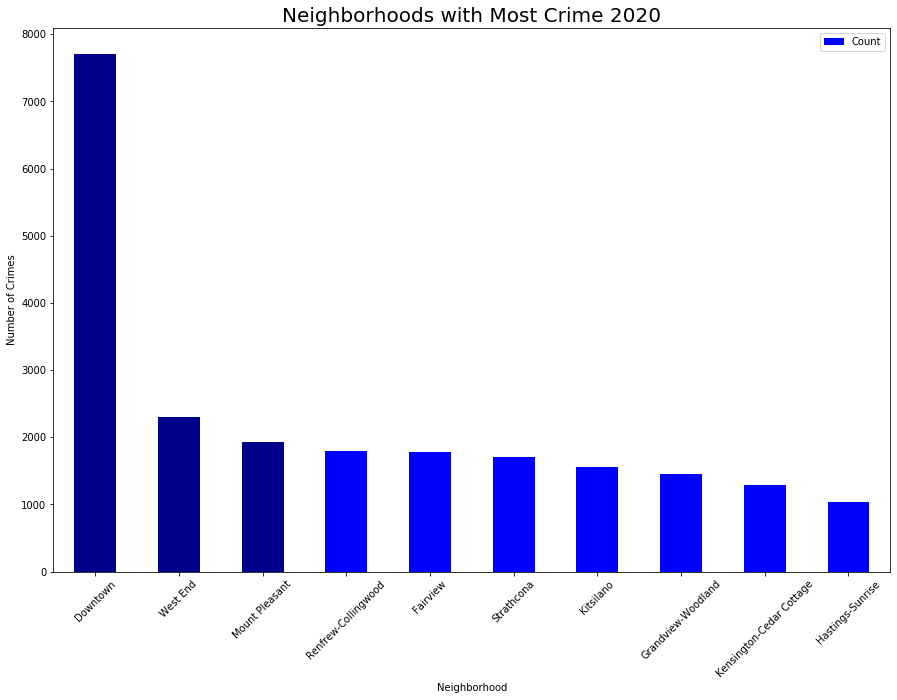

In [68]:
x = ['Downtown','West End','Mount Pleasant','Renfrew-Collingwood','Fairview','Strathcona','Kitsilano','Grandview-Woodland','Kensington-Cedar Cottage','Hastings-Sunrise']

crime_top = crime.iloc[0:10,]
top10 = crime_top.plot(kind='bar', color='blue',figsize=(15,10))
top10.patches[crime_top.index.get_indexer([0])[0]].set_facecolor('darkblue')
top10.patches[crime_top.index.get_indexer([1])[0]].set_facecolor('darkblue')
top10.patches[crime_top.index.get_indexer([2])[0]].set_facecolor('darkblue')
top10.set_xticklabels(x)  

plt.xlabel('Neighborhood') # add x-label to the plot
plt.ylabel('Number of Crimes') # add y-label to the plot
plt.title('Neighborhoods with Most Crime 2020', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

The figure above displays the top 10 neighborhoods with the highest number of crimes in Vancouver. Vancouver Downtown and West End have the largest number of crimes.

-------------------------------------------------------------------------------------------------------------------------------

### Results

Now, let's go to the results. What is the neighborhood with the best property price and what is the safest neighborhood in Vancouver? And how are the clusters distributed over the neighborhoods? Let's check out the type of venue for each cluster. 

In [69]:
#Determine map coordinates
address = 'Vancouver, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.2608724 -123.1139529


In [70]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged['Latitude'], Vancouver_merged['Longitude'], Vancouver_merged['Neighborhood'], Vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine the clusters**

The map above shows the 3 clusters. Let's examine the clusters below.

**Cluster 1**

Cluster 1 represents the largest cluster and the red dots. This cluster includes a variety of stores that are used in everyday life. It mainly includes venues that are related to food, such as coffee shops, pizza places, dessert shops, liquor stores, bakeries, sandwich places, convenience stores, coffee bars, and cafes. In addition, this cluster includes other basic needs of life, such as healthcare products (pharmacy, physical therapist). Bus stops are also very common.

In [71]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 0, Vancouver_merged.columns[[1] + list(range(8, Vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Hastings-Sunrise,Theme Park Ride / Attraction,Event Space,Theme Park,Amphitheater,Stadium
1,Grandview-Woodland,Café,Coffee Shop,Convenience Store,Fried Chicken Joint,Pizza Place
2,Kensington-Cedar Cottage,Pizza Place,Coffee Shop,Bus Stop,Sporting Goods Shop,Grocery Store
3,South Grandview-Woodlands / NE Kensington,Café,Gym / Fitness Center,Lake,Music Venue,Farmers Market
4,Victoria-Fraserview,Pizza Place,Fish Market,Pharmacy,Pet Store,Post Office
5,Renfrew-Collingwood,Bus Stop,Pharmacy,Park,Bar,Fish & Chips Shop
6,Killarney,Bus Stop,Liquor Store,Coffee Shop,Farmers Market,Salon / Barbershop
7,Mount Pleasant,Pizza Place,Sports Bar,Park,Outdoor Sculpture,Music Venue
8,Riley Park,Coffee Shop,Convenience Store,Café,Ice Cream Shop,Liquor Store
9,Sunset,Bus Stop,Coffee Shop,Fried Chicken Joint,Dessert Shop,Sandwich Place


**Cluster 2**

Cluster 2 represents the purple dots in the map. The cluster includes leisure. Parks, playgounds, pools, or other leasure activities (sports activities) are often found just outside the city center. 

In [72]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 1, Vancouver_merged.columns[[1] + list(range(8, Vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Marpole,Electronics Store,Park,Yoga Studio,Cosmetics Shop,Dog Run
23,West Point Grey,Pool,Park,Fish & Chips Shop,Dessert Shop,Dog Run
24,University Endowment Lands,Park,Yoga Studio,Cosmetics Shop,Dog Run,Electronics Store


**Cluster 3**

This cluster is more of a *'leftover'* cluster. The cluster includes stores you use in everyday life, but it also includes other types of venues that are somewhat related to leisure (yoga studio and dog run). This cluster represents the green dot.

In [73]:
Vancouver_merged.loc[Vancouver_merged['Cluster Labels'] == 2, Vancouver_merged.columns[[1] + list(range(8, Vancouver_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Arbutus Ridge,Bakery,Yoga Studio,Food & Drink Shop,Dog Run,Electronics Store


**Property Prices**

Now, let's have a look at the property prices in each neighborhood and the venues. I use folium to visualize the results in the map of Vancouver.

In [74]:
Vancouver_merged.head(5)

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,Property Prices,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,V5K,Hastings-Sunrise,British Columbia,Vancouver,49.2807,-123.0397,1052.207532,0,Theme Park Ride / Attraction,Event Space,Theme Park,Amphitheater,Stadium
1,V5L,Grandview-Woodland,British Columbia,Vancouver,49.2795,-123.0667,746.260426,0,Café,Coffee Shop,Convenience Store,Fried Chicken Joint,Pizza Place
2,V5M,Kensington-Cedar Cottage,British Columbia,Vancouver,49.2600,-123.0398,1223.617191,0,Pizza Place,Coffee Shop,Bus Stop,Sporting Goods Shop,Grocery Store
3,V5N,South Grandview-Woodlands / NE Kensington,British Columbia,Vancouver,49.2551,-123.0667,977.384303,0,Café,Gym / Fitness Center,Lake,Music Venue,Farmers Market
4,V5P,Victoria-Fraserview,British Columbia,Vancouver,49.2220,-123.0683,1203.854742,0,Pizza Place,Fish Market,Pharmacy,Pet Store,Post Office


In [75]:
#Determine map coordinates
address = 'Vancouver, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.2608724 -123.1139529


Let's import the Vancouver geo data.

In [76]:
geo_vancouver = r'.../Coursera/IBM - Data Science/capestone project/capstone project week 4/data collection/Vancouver Crime data/Vancouver.json'


The housing data frame includes the property prices for each neighborhood (where property prices is per k).

In [77]:
housing_data = Vancouver_merged[['Neighborhood','Property Prices']]
housing_data

,Neighborhood,Property Prices
0,Hastings-Sunrise,1052.207532
1,Grandview-Woodland,746.260426
2,Kensington-Cedar Cottage,1223.617191
3,South Grandview-Woodlands / NE Kensington,977.384303
4,Victoria-Fraserview,1203.854742
5,Renfrew-Collingwood,1083.383626
6,Killarney,1645.179569
7,Mount Pleasant,717.874244
8,Riley Park,1201.496708
9,Sunset,1195.994199


In [78]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
    
#Property prices data
threshold_scale = np.linspace(Vancouver_merged['Property Prices'].min(),
                              Vancouver_merged['Property Prices'].max(),
                              6)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1

map_clusters.choropleth(
    geo_data = geo_vancouver,
    name = 'Vancouver Property Prices and Venues',
    data = housing_data,
    columns = ['Neighborhood','Property Prices'],
    key_on = 'feature.properties.name',
    threshold_scale = threshold_scale,
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Property Prices in Vancouver'
)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged['Latitude'], Vancouver_merged['Longitude'], Vancouver_merged['Neighborhood'], Vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



The map displays the property prices and the cluster/ type of venues that is most common in a certain neighborhood. Downtown is excluded from the analysis because of very high property prices. Neighborhood *'Dunbar Southlands'* did not have venues available from Foursquare. The darker the neighborhood, the higher the property price.

**Vancouver Crime**

In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
    
#crime data
threshold_scale = np.linspace(crime['Count'].min(),
                              crime['Count'].max(),
                              6)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

map_clusters.choropleth(
    geo_data = geo_vancouver,
    name = 'Vancouver Crime and Venues',
    data = crime,
    columns = ['NEIGHBOURHOOD','Count'],
    key_on = 'feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Crime in Vancouver'
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Vancouver_merged['Latitude'], Vancouver_merged['Longitude'], Vancouver_merged['Neighborhood'], Vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The crime rate is highest for the neighborhoods that are centered around Vancouver Downtown.

-------------------------------------------------------------------------------------------------------------------------------

### Discussion

Neighborhoods located more to the west have a higher property price. These neighborhoods have reasonably low crime rates and these neighborhoods are home to venues with more leisure activities. Due to the high property price, these neighborhoods might not be optimal to live. 
<br>
A good option would be the South of Vancouver. Crime rates are lower, you have close proximity to venues with leisure activities, and prices are not as high as in the neighborhoods located in the west. Neighborhood *'Sunset'* or neighborhood *'Marpole'* could be an option to live in! 
<br>
However, property prices in the north eastern part are lower. Crime rates in neighborhood Grandview-Woodland and Hastings-Sunrise are rather low compared to other neighborhoods centered around Vancouver Downtown. In these neighborhoods, property prices are also lower. The only drawback is that it is that the neighborhoods are not located near a cluster with leisure activities. Neighborhood Renfrew-Collingwood has lower property prices, but a reasonably high crime rate. Renfrew-Collingwood is less safe, and therefore, this neighborhood would not be optimal to live in. 

Now, let's compare the 4 optional neighborhoods: neighborhood Marpole, neighborhood Grandview-Woodland, neighborhood Marpole, and neighborhood Hastings-Sunrise. 

In [80]:
neighborhood_list = ['Hastings-Sunrise','Marpole','Sunset','Grandview-Woodland']

**Neighborhoods compared by housing price**

In [81]:
property_price_options = housing_data[housing_data['Neighborhood'].isin(neighborhood_list)]
property_price_options

,Neighborhood,Property Prices
0,Hastings-Sunrise,1052.207532
1,Grandview-Woodland,746.260426
9,Sunset,1195.994199
10,Marpole,1353.811116


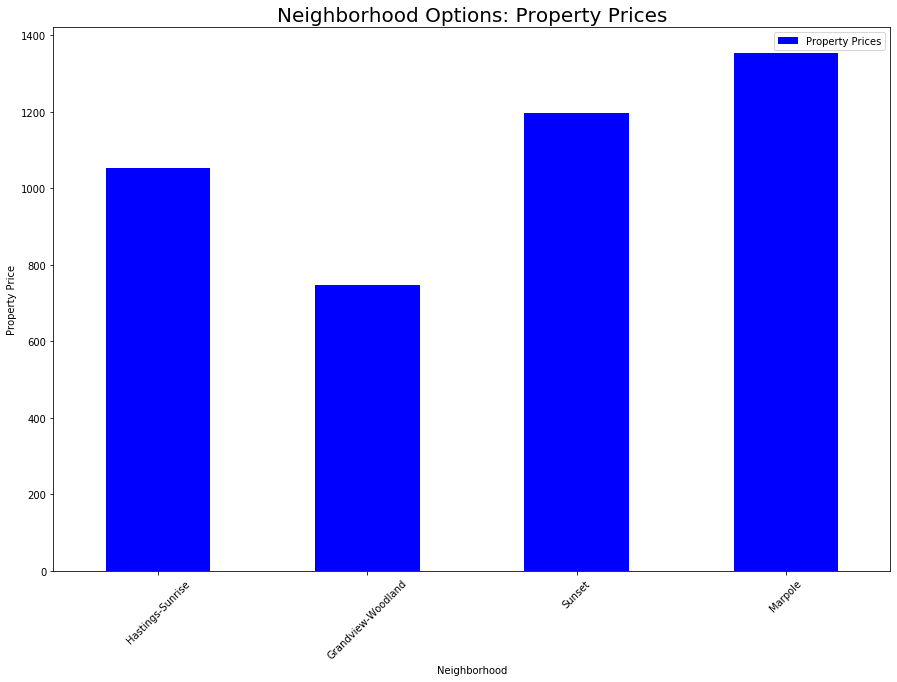

In [82]:
x = ['Hastings-Sunrise','Grandview-Woodland','Sunset','Marpole']

property_price_options = property_price_options.plot(kind='bar', color='blue',figsize=(15,10))
property_price_options.set_xticklabels(x)  

plt.xlabel('Neighborhood') # add x-label to the plot
plt.ylabel('Property Price') # add y-label to the plot
plt.title('Neighborhood Options: Property Prices', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

**Neighborhoods compared by Foursquare Venues**

In [83]:
Venues_options = Vancouver_merged[Vancouver_merged['Neighborhood'].isin(neighborhood_list)]
Venues_options

,Postal_Code,Neighborhood,State,City,Latitude,Longitude,Property Prices,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,V5K,Hastings-Sunrise,British Columbia,Vancouver,49.2807,-123.0397,1052.207532,0,Theme Park Ride / Attraction,Event Space,Theme Park,Amphitheater,Stadium
1,V5L,Grandview-Woodland,British Columbia,Vancouver,49.2795,-123.0667,746.260426,0,Café,Coffee Shop,Convenience Store,Fried Chicken Joint,Pizza Place
9,V5W,Sunset,British Columbia,Vancouver,49.2327,-123.0917,1195.994199,0,Bus Stop,Coffee Shop,Fried Chicken Joint,Dessert Shop,Sandwich Place
10,V5X,Marpole,British Columbia,Vancouver,49.2156,-123.0979,1353.811116,1,Electronics Store,Park,Yoga Studio,Cosmetics Shop,Dog Run


Neighborhood Marpole has the best venue options in terms of leisure. Hasterings-Sunrise has the least options, and Grandview-Woodland has some good food venues nearby. Neighborhood sunset has some good food venues as well, there is a bus stop and this neighborhood is close to Marpole. In terms of amenities, Neighborhood Sunset would be the best option to live in.

**Neighborhoods compared by crime**

In [84]:
neighborhood_options_crime = crime[crime['NEIGHBOURHOOD'].isin(neighborhood_list)]
neighborhood_options_crime

,NEIGHBOURHOOD,Count
7,Grandview-Woodland,1458
9,Hastings-Sunrise,1036
10,Sunset,860
11,Marpole,731


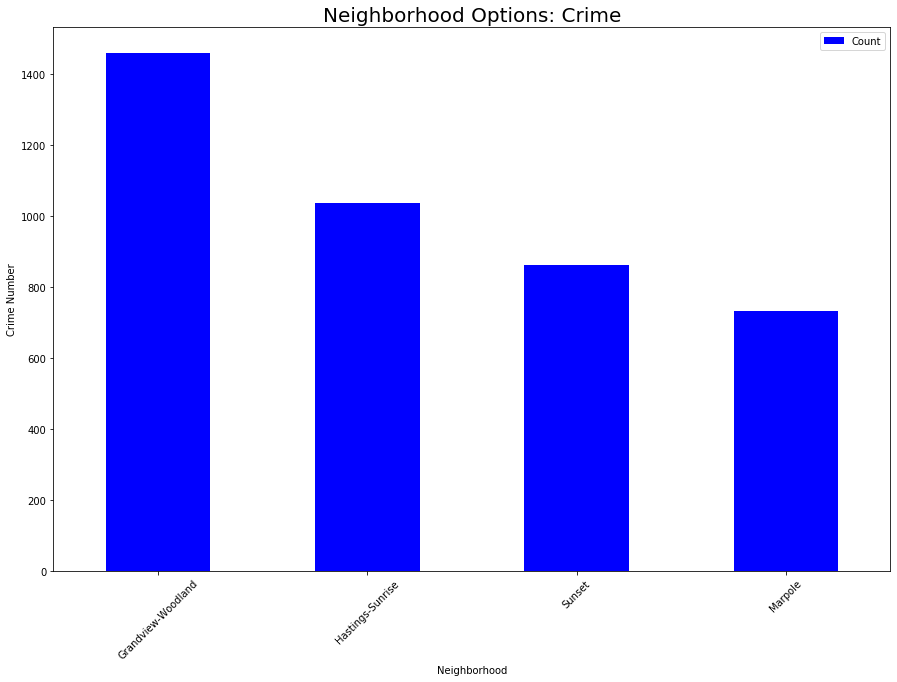

In [85]:
x = ['Grandview-Woodland','Hastings-Sunrise','Sunset','Marpole']

neighborhood_options_crime = neighborhood_options_crime.plot(kind='bar', color='blue',figsize=(15,10))
neighborhood_options_crime.set_xticklabels(x)  

plt.xlabel('Neighborhood') # add x-label to the plot
plt.ylabel('Crime Number') # add y-label to the plot
plt.title('Neighborhood Options: Crime', fontsize = 20)
plt.xticks(rotation=45)

plt.show()

Neighborhood Sunset and Marpole have the lowest crime number. Neighborhood Marpole would be optimal in terms of crime number.

-------------------------------------------------------------------------------------------------------------------------------

### Conclusion

Neighborhood Sunset is the best neighborhood to live in. Compared to other neighborhoods, it has a relatively low crime rate. Neighborhood Marpole has a lower crime rate, but the property prices are quite high for this neighborhood. Neighborhood Sunset has some food venues nearby, there is a park nearby, and there is a bus stop nearby. 

**This is the end of this analysis. Hope you enjoyed it!**